# Outlier filtering with focus on phase diagram

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from astropy.coordinates import SkyCoord
from functools import partial
import os
os.chdir('/home/jovyan/work/src')
import do_charts_vast
import reading
import utils
from star_description import StarDescription

%matplotlib inline
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

## Supporting functions

In [2]:
def massage_df_for_phase_plot(df: DataFrame):
    df['floatJD'] = df['JD'].astype(np.float)
    df['realV'] = df['Vrel']
    df['realErr'] = df['err']
    return df

In [3]:
def perc_change_filter(df: DataFrame, column: str, perc=.3):
#     df["norm"] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
#     df["change"] =df["norm"].pct_change()
    df["change"] =df[column].pct_change()
#     print("norm", df["norm"].describe())
    print("change", df["change"].describe())
    df[np.isfinite(df['change'])]['change'].hist()
    #     del df["norm"]
    #     del df["change"]
    return df[(abs(df["change"]) < perc)]

def abs_change_filter(df: DataFrame, column: str, perc=.3):
#     meanv = df[column].mean()
    df["change"] =abs(df[column].diff())
    print("change", df["change"].describe())
    df[np.isfinite(df['change'])]['change'].hist()
    #     del df["norm"]
    #     del df["change"]
    return df[(df["change"] > perc)]


def less_than_filter(df: DataFrame, column: str, max=.1):
    df[np.isfinite(df[column])][column].hist()
    return df[(abs(df[column]) < max)]

def none_phase_filter(time, lc):
    return time, lc

In [4]:
def read_light_curve(star_id):
    df = reading.read_lightcurve_vast(f"../tests/data/outliers/out{star_id:05}.dat")
    return massage_df_for_phase_plot(df)
 
def plot_star(star_id, cleaning_func):
    star = StarDescription(local_id=star_id, coords=SkyCoord(ra=5.6, dec=-72, unit='deg'))
    df = read_light_curve(star_id)
    print("curve before cleaning:", len(df))
    plt, t, lc = do_charts_vast.plot_phase_diagram(star, df, "bla", write_plot=False, filter_func=cleaning_func)
    print("curve after cleaning:", len(lc))
    plt.show()
    return t, lc

In [10]:
iqr_func = partial(utils.reject_outliers_iqr, column="realV", cut=20)
perc_func = partial(perc_change_filter, column="realV", perc=.2)
abs_func = partial(abs_change_filter, column="realV", perc=.4)
less_than_func = partial(less_than_filter, column="realErr", max=.1)
none_func = lambda x: x

## Reading light curves

8086
change count    8085.000000
mean        0.145340
std         0.109038
min         0.000033
25%         0.057188
50%         0.122381
75%         0.214419
max         0.781597
Name: change, dtype: float64
1


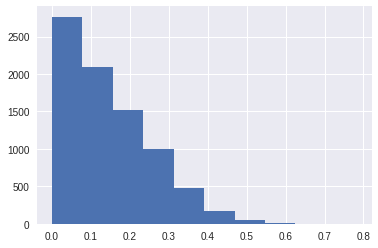

In [7]:
test_curve = read_light_curve(3855)
print(len(test_curve))
# perc_result = perc_change_filter(test_curve, "realV", perc=.8)
result = abs_change_filter(test_curve, "realV", perc=.7)
print(len(result))
# print("change", perc_result["change"].describe())
# print("norm", perc_result["norm"].describe())

In [11]:
stars = [3855, 7668, 9235]
one_star = [3855]
t=[]
lc=[]
def plot_stars(stars, outlier_func):
    for star in stars:
        t, lc = plot_star(star, outlier_func)

%time plot_stars(stars, none_phase_filter)

curve before cleaning: 8086


AssertionError: 

In [9]:
one_star = [9235]
%time t, lc = plot_star(one_star[0], none_phase_filter)


curve before cleaning: 7752


AssertionError: 

In [471]:
df = read_light_curve(one_star[0])
grouper = np.round(t, 1)
print("length of curve is", len(df))
result = df['realV'].groupby(grouper)
ind = result.indices
sum = 0


allmask = np.array([])
for name, group in result:
    sum = sum + len(group)
    groupmean = group.mean()
    groupstd = group.std()
    mask = abs(group - groupmean) < 2*groupstd
    print(mask.values, len(group))
    np.append(allmask, mask.values, axis=0)
    print("allmask len is ", len(allmask))
print(f"lenfth mask is {len(allmask)}, lentg df is {len(df)}")
df = df[allmask]
print("length is", len(df), sum)


length of curve is 7752
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True False  True  True  True] 29
allmask len is  0
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True] 16
allmask len is  0
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True] 20
allmask len is  0
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True] 14
allmask len is  0
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True] 40
allmask len is  0
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True] 16
allmask len is  0
[ True  True  True 

In [472]:
ind[0.1] < ind[0.1]

KeyError: 0.1